# Time Series Analysis: Cowboy Cigarettes Sales Forecasting (1949-1960)
## Predicting Early 1960s Sales Trends for Public Health Policy Assessment

**Author:** Sanjay Kumar Chhetri  
**Date:** December 2025

## Executive Summary

As a data scientist working with the U.S. Federal Health and Environment Department, I was tasked with analyzing sales trends for **Cowboy Cigarettes (TM, est. 1890)**, America's longest-operating cigarette manufacturer. The objective: determine whether this major tobacco producer experienced increasing, decreasing, or stable sales during the early 1960s—a critical period for public health policy.

The challenge lies in the data gaps. Like many cigarette companies of that era, Cowboy Cigarettes maintained limited public transparency regarding their sales figures. I have access to only 11 years of post-war data (1949-1960), followed by a decade-long information void until records resume in 1970. My assignment is to use this 1949-1960 baseline to reconstruct probable sales trajectories for the missing 1961-1963 period—essentially, forecasting the future from the perspective of the past.

This analysis will contribute to a comprehensive federal report examining the relationship between public health outcomes and the tobacco industry's economic performance during a pivotal era in American health policy. The findings will be integrated with complementary studies from colleagues to inform government recommendations on tobacco regulation and public health initiatives.

### Analysis Framework

**Phase 1: Data Acquisition & Exploration**
- Environment configuration and library initialization
- Data ingestion and preliminary assessment
- Quality validation and structural examination

**Phase 2: Data Preparation & Visualization**
- Feature engineering and column standardization
- Temporal indexing and frequency normalization
- Descriptive statistics and visual trend identification

**Phase 3: Statistical Modeling**
- Time series decomposition (trend, seasonality, residuals)
- Stationarity testing and transformation
- ARIMA model selection and optimization
- Model validation and performance assessment

**Phase 4: Forecasting & Conclusions**
- 36-month forward projection (1961-1963)
- Results interpretation and business implications
- Recommendations for policy consideration

## Methodology: Time Series Analysis

This analysis employs time series forecasting techniques to model temporal patterns in cigarette sales data. Time series analysis examines sequential data points collected at consistent intervals, enabling the identification of underlying patterns, trends, and seasonal effects. This methodology is particularly well-suited for sales forecasting, as it can capture both long-term growth trajectories and cyclical demand fluctuations inherent in consumer product markets.

The analytical approach combines classical decomposition methods with ARIMA (AutoRegressive Integrated Moving Average) modeling to generate statistically robust predictions while accounting for the complex interplay of trend and seasonality in the tobacco retail market.

## 1. Environment Setup & Data Acquisition

### Technical Infrastructure
Initializing the analytical environment with required statistical and visualization libraries.

In [43]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Time series decomposition for trend and seasonality analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Enable inline plotting in Jupyter
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


### Data Ingestion
Loading historical sales records from the Cowboy Cigarettes dataset (1949-1960).

In [44]:
# Load the historical cigarette sales dataset (1949-1960)
# Data contains monthly sales figures for Cowboy Cigarettes
cigData = pd.read_csv(r'C:\Users\sanja\OneDrive\Documents\GitHub\Cowboys_Cigerrate_time_seriesIinvestigation\CowboyCigsData.csv')

### Initial Data Assessment
Examining dataset structure, dimensions, and suitability for time series analysis.

In [45]:
# Check dataset dimensions (rows, columns)
cigData.shape

(144, 3)

In [46]:
# Display first 5 rows to understand data structure
cigData.head()

,Unnamed: 0,Time,#CigSales
0,0,1949-01,1000112
1,1,1949-02,1000118
2,2,1949-03,1000132
3,3,1949-04,1000129
4,4,1949-05,1000121


The dataset reveals baseline sales exceeding 1 million units in January 1949, indicating substantial market presence for this established manufacturer.

### Column Structure Analysis
Examining the dataset's feature composition and variable organization.

In [47]:
# Examine column names and structure
cigData.columns

Index(['Unnamed: 0', 'Time', '#CigSales'], dtype='object')

### Data Type Validation
Assessing variable types to ensure proper handling in subsequent transformations.

In [48]:
# Check data types of each column (important for proper handling)
cigData.dtypes

Unnamed: 0     int64
Time          object
#CigSales      int64
dtype: object

### Data Quality Assessment
Verifying data completeness and identifying any missing values that could impact analysis.

In [49]:
# Count missing values in each column
# Time series analysis requires complete data without gaps
cigData.isnull().sum()

Unnamed: 0    0
Time          0
#CigSales     0
dtype: int64

## 2. Data Preprocessing & Exploratory Analysis

### Feature Engineering: Removing Redundant Columns
Eliminating extraneous index columns that provide no analytical value.

In [50]:
# Remove the redundant index column created during CSV export
cigData = cigData.drop(columns=["Unnamed: 0"])

# Verify the column was removed successfully
cigData.head()

,Time,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121


### Variable Standardization

Renaming the temporal variable to accurately reflect its monthly granularity, improving semantic clarity.

In [51]:
# Rename 'Time' to 'Month' for better semantic clarity
# This accurately reflects the monthly granularity of the data
cigData = cigData.rename(columns={"Time":"Month"})

Verifying the column rename operation:

In [52]:
# Confirm the rename was successful
cigData.head()

,Month,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121


In [53]:
# Display updated column names after transformation
cigData.columns

Index(['Month', '#CigSales'], dtype='object')

### Temporal Data Processing

For optimal time series analysis, temporal data must be properly indexed. Converting the Month variable from string format to datetime objects and establishing it as the primary index enables time-aware operations and ensures correct temporal ordering. This transformation is essential for subsequent decomposition and forecasting procedures.

In [54]:
# Convert Month column from string to datetime objects
# This enables time-aware operations and proper temporal ordering
cigData["Month"] = pd.to_datetime(cigData["Month"])

# Set Month as the index (required for time series analysis)
cigData = cigData.set_index("Month")

# Rename target column to remove special character and improve readability
cigData = cigData.rename(columns={"#CigSales":"CigSales"})

# Enforce monthly frequency with 'MS' (Month Start)
# This ensures pandas recognizes the consistent monthly intervals
cigData = cigData.asfreq("MS")

# Display the transformed dataframe
cigData.head()

,CigSales
Month,
1949-01-01,1000112
1949-02-01,1000118
1949-03-01,1000132
1949-04-01,1000129
1949-05-01,1000121


Temporal indexing successfully established with monthly frequency.

### Target Variable Definition

With temporal indexing established, we isolate the target variable (cigarette sales) as `y` for streamlined modeling operations. This convention aligns with standard machine learning and statistical notation.

In [55]:
# Extract the target variable (cigarette sales) as a pandas Series
# 'y' is standard notation for the dependent variable in statistical modeling
y = cigData['CigSales']

# Display first 5 values
y.head()

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
Freq: MS, Name: CigSales, dtype: int64

Confirming the target variable structure:

In [56]:
# Verify that y is a pandas Series (required for time series operations)
type(y)

pandas.core.series.Series

### Descriptive Statistics

Generating comprehensive statistical summary of sales distribution:

In [57]:
# Generate descriptive statistics: count, mean, std, min, quartiles, max
# Provides quick overview of sales distribution and range
y.describe()

count    1.440000e+02
mean     1.000280e+06
std      1.199663e+02
min      1.000104e+06
25%      1.000180e+06
50%      1.000266e+06
75%      1.000360e+06
max      1.000622e+06
Name: CigSales, dtype: float64

### Visual Trend Analysis

Visualizing the complete time series to identify preliminary patterns:

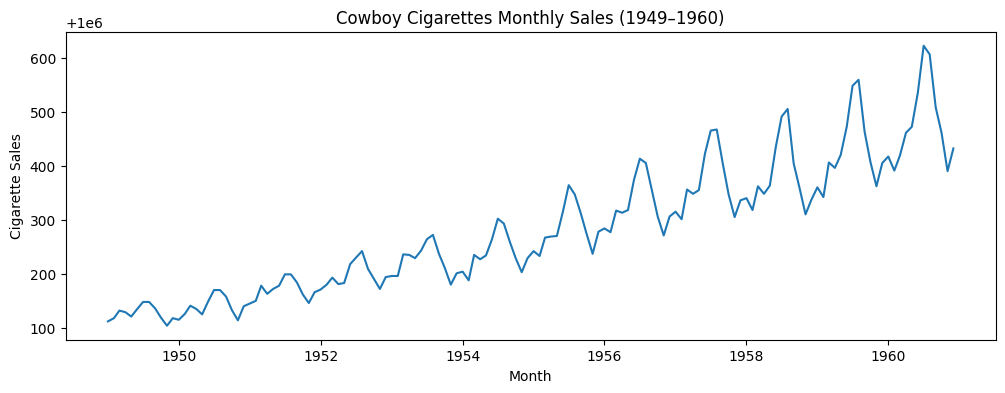

In [58]:
# Create a line plot of the complete time series
# Look for: overall trend, seasonal patterns, outliers, and stationarity
plt.figure(figsize=(12,4))  # Set figure size for better readability
plt.plot(y)  # Plot sales over time
plt.title("Cowboy Cigarettes Monthly Sales (1949–1960)")
plt.xlabel("Month")
plt.ylabel("Cigarette Sales")
plt.show()

## 3. Statistical Modeling & Forecasting

### Time Series Decomposition

Visual inspection reveals a consistent upward trajectory in cigarette sales throughout the observation period, accompanied by pronounced seasonal fluctuations. These cyclical patterns exhibit increasing amplitude over time, suggesting multiplicative rather than additive seasonality.

Time series decomposition isolates three fundamental components:

1. **Trend Component**: The long-term directional movement (growth or decline)
2. **Seasonal Component**: Regular cyclical patterns occurring at fixed intervals
3. **Residual Component**: Random noise unexplained by trend or seasonality

The relationship between these components can be either:
- **Additive**: Components sum together (suitable when seasonal variation is constant)
- **Multiplicative**: Components multiply together (appropriate when seasonal variation increases with trend level)

Given the expanding seasonal amplitude observed in this dataset, a multiplicative decomposition framework is theoretically appropriate. However, for modeling purposes, we'll apply log transformation to convert multiplicative relationships into additive form, which is more suitable for ARIMA methodology.

### Decomposition Results Interpretation

The decomposition confirms multiplicative behavior: as the overall sales trend accelerates, seasonal variations grow proportionally. This pattern indicates that percentage-based seasonal effects remain relatively stable even as absolute sales volumes increase.

In an additive model, we would expect constant-magnitude seasonal swings regardless of trend level. The observed pattern—where seasonal peaks and troughs expand in tandem with rising baseline sales—definitively indicates multiplicative dynamics.

The decomposition visualization below quantifies each component's contribution to the observed sales pattern:

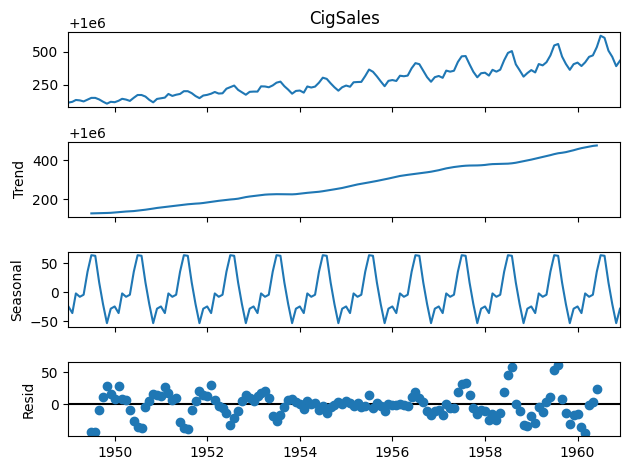

In [59]:
# Decompose the time series into trend, seasonal, and residual components
# model="additive": assumes components sum together (Observed = Trend + Seasonal + Residual)
# period=12: specifies annual seasonality (12 months)
decomp = seasonal_decompose(y, model="additive", period=12)

# Generate multi-panel plot showing:
# 1. Original observed data
# 2. Trend component (long-term direction)
# 3. Seasonal component (repeating annual pattern)
# 4. Residual component (random noise)
decomp.plot()
plt.show()

### Stationarity Assessment: KPSS Test

ARIMA modeling requires stationary input data—series with constant statistical properties (mean, variance, autocovariance) over time. The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test provides a formal statistical framework for assessing stationarity.


**Test Hypothesis Structure:**A p-value below the significance threshold (α = 0.05) indicates sufficient evidence to reject stationarity, necessitating transformation procedures.

- H₀ (Null): The series is stationary
- H₁ (Alternative): The series is non-stationary

In [60]:
# Import KPSS stationarity test
from statsmodels.tsa.stattools import kpss

def kpss_test(series, regression="c", nlags="auto"):
    """
    Perform KPSS test for stationarity.
    
    H0 (Null): Series is stationary
    H1 (Alternative): Series is non-stationary
    
    If p-value < 0.05: Reject H0 (series is non-stationary)
    If p-value >= 0.05: Accept H0 (series is stationary)
    """
    statistic, p_value, n_lags, critical_values = kpss(series, regression=regression, nlags=nlags)
    
    # Display test results
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value:        {p_value:.4f}")
    print(f"num lags:       {n_lags}")
    print("critical values:")
    for k, v in critical_values.items():
        print(f"  {k}: {v}")

# Run KPSS test on original series
kpss_test(y)

KPSS Statistic: 1.6513
p-value:        0.0100
num lags:       8
critical values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


**Test Result Interpretation:**

The KPSS test yields p < 0.05, providing strong evidence against the null hypothesis of stationarity. This confirms the presence of non-constant statistical properties—specifically, the upward trend and evolving variance observed visually.

To satisfy ARIMA prerequisites, transformation procedures are required to induce stationarity.

### Stationarity Transformation Procedures

Reviewing the original series characteristics before transformation:

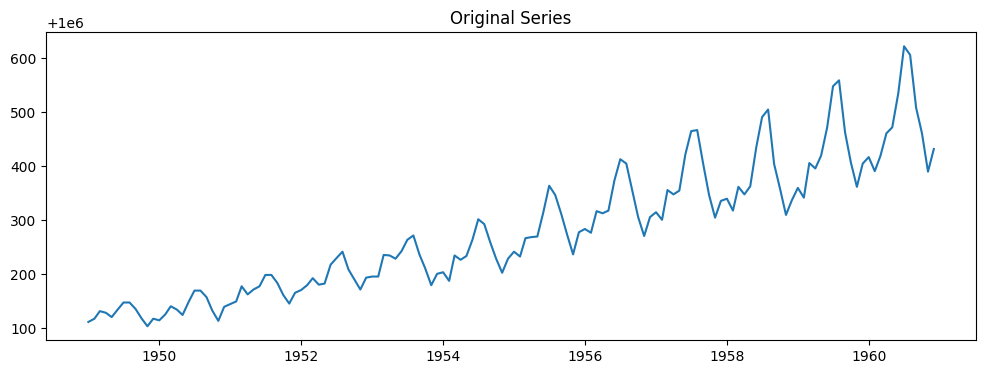

In [61]:
# Visualize the original series before transformation
# Note the increasing mean and variance over time
plt.figure(figsize=(12,4))
plt.plot(y)
plt.title("Original Series")
plt.show()

**Variance Stabilization via Logarithmic Transformation**

The original series exhibits heteroskedasticity (non-constant variance), with variability increasing proportionally to the level. Both mean and variance trend upward over time, violating stationarity requirements.

Logarithmic transformation addresses variance instability by converting multiplicative relationships into additive ones, compressing the scale of larger values more than smaller ones. This technique is particularly effective for series with exponential growth patterns.

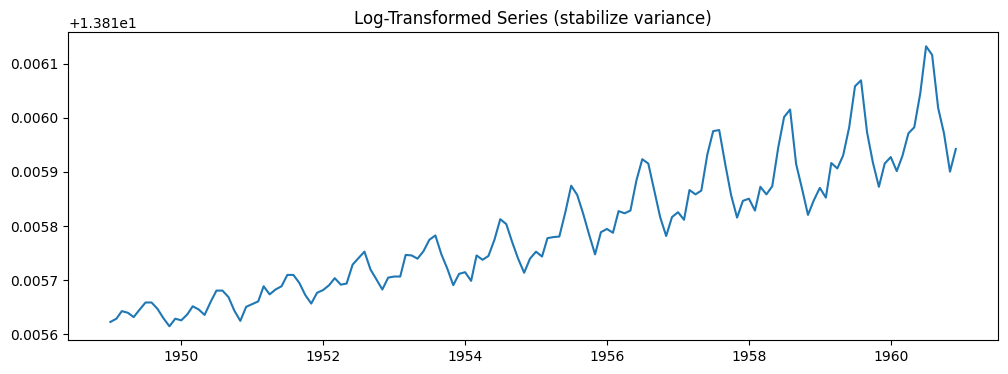

In [62]:
# Apply natural logarithm transformation to stabilize variance
# Log transformation converts multiplicative effects into additive ones
y_log = np.log(y)

# Visualize the log-transformed series
# The variance should now appear more constant across time
plt.figure(figsize=(12,4))
plt.plot(y_log)
plt.title("Log-Transformed Series (stabilize variance)")
plt.show()

**Transformation Outcome:** The log-transformed series exhibits stabilized variance across the observation period, addressing the heteroskedasticity issue.

In [63]:
# Summary statistics of log-transformed series
# Note: values are now in log scale
y_log.describe()

count    144.000000
mean      13.815791
std        0.000120
min       13.815615
25%       13.815691
50%       13.815776
75%       13.815871
max       13.816132
Name: CigSales, dtype: float64

**Mean Stabilization via First-Order Differencing**

While variance has been stabilized, the series retains a non-constant mean due to the persistent upward trend. First-order differencing eliminates this trend component by computing period-over-period changes rather than absolute levels.

Mathematically: `yₜ' = yₜ - yₜ₋₁`

This transformation removes trend-based non-stationarity while preserving information about the rate of change. Note that differencing reduces the series length by one observation.

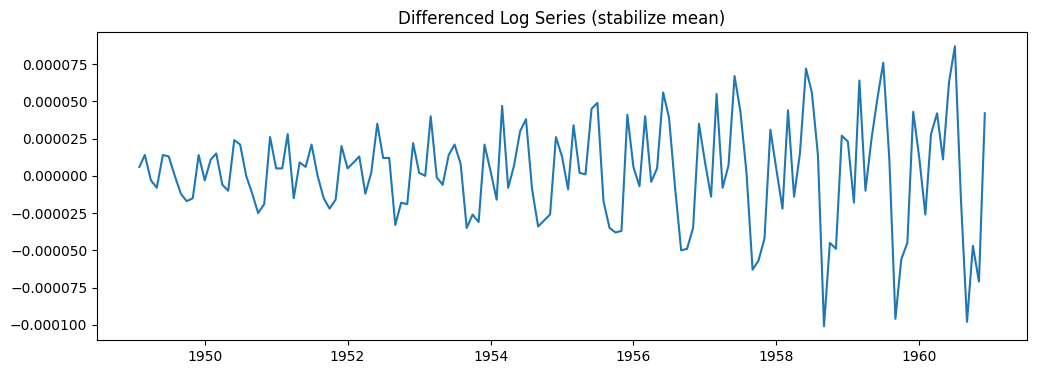

KPSS Statistic: 0.0239
p-value:        0.1000
num lags:       7
critical values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


In [64]:
# Apply first-order differencing to remove trend and stabilize mean
# diff() computes: value(t) - value(t-1)
# dropna() removes the first NaN value created by differencing
y_log_diff = y_log.diff().dropna()

# Plot the differenced series
# Should now fluctuate around a constant mean (zero)
plt.figure(figsize=(12,4))
plt.plot(y_log_diff)
plt.title("Differenced Log Series (stabilize mean)")
plt.show()

# Retest for stationarity - expect p-value > 0.05
kpss_test(y_log_diff)

**Stationarity Confirmation:**

The KPSS test on the transformed series yields p > 0.05, indicating insufficient evidence to reject the null hypothesis of stationarity. The combined log-transformation and first-order differencing have successfully induced the statistical properties required for ARIMA modeling.

### ARIMA Model Development

AutoRegressive Integrated Moving Average (ARIMA) models forecast future values by leveraging patterns in historical observations while accounting for inherent randomness. The model structure incorporates:

- **AR (p)**: AutoRegressive component using past values

- **I (d)**: Integration order (differencing degree)Optimal parameter selection employs grid search with cross-validation, minimizing Mean Squared Error (MSE) across candidate model configurations.

- **MA (q)**: Moving Average component using past forecast errors

In [65]:
# Import evaluation metric and ARIMA model
# MSE (Mean Squared Error): measures prediction accuracy
# ARIMA: AutoRegressive Integrated Moving Average model for forecasting
# Note: Using statsmodels.tsa.arima.model (current) instead of deprecated arima_model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

#### Model Evaluation Function
Implementing cross-validation framework to assess ARIMA performance on held-out data:

In [66]:
def arima_mse(series, order, train_size=None):
    """
    Evaluate ARIMA model performance using train-test split.
    
    Parameters:
    - series: Time series data (pandas Series)
    - order: ARIMA order tuple (p, d, q)
    - train_size: Number of observations for training (default: 90% of data)
    
    Returns:
    - MSE (Mean Squared Error) on test set
    """
    # Use 90% of data for training if not specified
    if train_size is None:
        train_size = int(len(series) * 0.9)
    
    # Split data into training and testing sets
    train, test = series.iloc[:train_size], series.iloc[train_size:]
    
    # Fit ARIMA model on training data
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Generate forecasts for test period
    preds = model_fit.forecast(steps=len(test))
    
    # Calculate and return prediction error
    return mean_squared_error(test, preds)

#### Hyperparameter Optimization via Grid Search
Systematically evaluating ARIMA configurations across parameter space:

In [67]:
def evaluate_arima_models(series, p_values, d_values, q_values):
    """
    Grid search to find optimal ARIMA parameters.
    
    Tests all combinations of (p, d, q) and selects the model with lowest MSE.
    
    Parameters:
    - series: Time series data
    - p_values: Range of AR (autoregressive) terms to test
    - d_values: Range of differencing orders to test
    - q_values: Range of MA (moving average) terms to test
    
    Returns:
    - best_cfg: Optimal (p, d, q) tuple
    - best_score: Lowest MSE achieved
    """
    best_score, best_cfg = float("inf"), None
    
    # Test all possible combinations of parameters
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    # Evaluate this configuration
                    mse = arima_mse(series, order)
                    # Uncomment to see all results: print(f"ARIMA{order} MSE={mse:.8f}")
                    
                    # Track the best model so far
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except Exception:
                    # Skip configurations that fail to converge
                    continue
    
    # Display optimal configuration
    print(f"Best ARIMA{best_cfg} MSE={best_score:.8f}")
    return best_cfg, best_score

In [68]:
# Define parameter search space for grid search
# Keeping ranges small for computational efficiency (total: 3*2*3 = 18 models)
p_values = range(0, 3)  # AR terms: 0, 1, 2
d_values = range(0, 2)  # Differencing: 0, 1 (we already did log + diff, so d=1 expected)
q_values = range(0, 3)  # MA terms: 0, 1, 2

In [69]:
# Run grid search on log-transformed series
# Note: Using y_log (not y_log_diff) because ARIMA handles differencing internally via 'd' parameter
best_cfg, best_score = evaluate_arima_models(y_log, p_values, d_values, q_values)

# Display the optimal configuration
best_cfg

Best ARIMA(2, 1, 1) MSE=0.00000001


(2, 1, 1)

**Optimal Model Selection:** ARIMA(2, 1, 1)

Proceeding with final model training:

Grid search identifies optimal parameters: p=2 (two autoregressive terms), d=1 (first-order differencing), q=1 (one moving average term). This configuration minimizes out-of-sample prediction error.

In [70]:
# Build the final ARIMA model using optimal parameters from grid search
# Train on the full log-transformed dataset
model = ARIMA(y_log, order=best_cfg)

# Fit the model (estimate coefficients)
model_fit = model.fit()

### Model Diagnostics
Examining comprehensive statistical summary including coefficient estimates, standard errors, and fit metrics:

In [71]:
# Display comprehensive model diagnostics:
# - Coefficient estimates and significance tests
# - Information criteria (AIC, BIC)
# - Residual statistics
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               CigSales   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1287.245
Date:                Tue, 16 Dec 2025   AIC                          -2566.490
Time:                        21:03:06   BIC                          -2554.639
Sample:                    01-01-1949   HQIC                         -2561.674
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0575   1.33e-19   7.98e+18      0.000       1.057       1.057
ar.L2         -0.4391   7.17e-19  -6.12e+17      0.000      -0.439      -0.439
ma.L1         -0.7080   3.89e-20  -1.82e+19      0.000      -0.708      -0.708
sigma2      7.158e-10   2.65e-10      2.705      0.007    1.97e-10    1.23e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.40   Prob(JB):                         0.73
Heteroskedasticity (H):               7.95   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.97e+35. Standard errors may be unstable.
"""

### Model Validation: In-Sample Fit Assessment

Comparing observed historical values against model-fitted values to assess predictive accuracy:

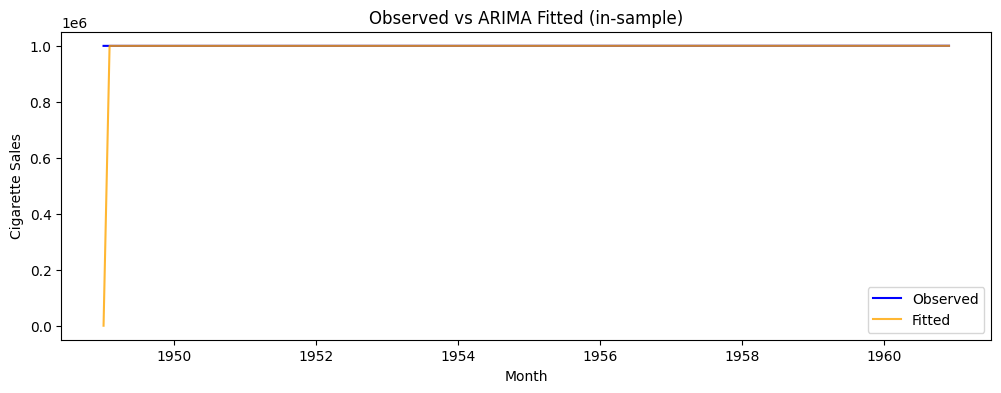

In [72]:
# Extract fitted values from the trained model
fitted_log = model_fit.fittedvalues

# Transform back to original scale using exponential (inverse of log)
# This allows comparison with actual observed sales
fitted = np.exp(fitted_log)

# Visualize model fit quality
# Good fit indicated by close alignment between observed and fitted lines
plt.figure(figsize=(12,4))
plt.plot(y, label="Observed", color='blue')  # Actual historical data
plt.plot(fitted, label="Fitted", alpha=0.8, color='orange')  # Model predictions
plt.title("Observed vs ARIMA Fitted (in-sample)")
plt.xlabel("Month")
plt.ylabel("Cigarette Sales")
plt.legend()
plt.show()

### Forward Projection: 1961-1963 Sales Forecast

With model validation confirming adequate fit to historical data, we now generate 36-month-ahead forecasts to reconstruct probable sales trajectories for the early 1960s gap period.

In [73]:
# Define forecast horizon: 36 months (3 years) to cover 1961-1963 gap period
forecast_period = 36

# Create date index for forecast period
# Start one month after last observed date, generate 36 monthly timestamps
forecast_index = pd.date_range(start=y.index[-1] + pd.offsets.MonthBegin(1),
                               periods=forecast_period, freq="MS")

# Generate forecasts using the trained model
pred = model_fit.get_forecast(steps=forecast_period)
pred_mean_log = pred.predicted_mean  # Point forecasts (in log scale)
pred_mean_log.index = forecast_index  # Assign proper date index

# Create dataframe with forecasts in both log and original scales
forecast_df = pd.DataFrame({
    "predicted_log_sales": pred_mean_log,
    "predicted_sales": np.exp(pred_mean_log)  # Back-transform to original scale
})

# Display first 5 forecasted months
forecast_df.head()

,predicted_log_sales,predicted_sales
1961-01-01,13.815979,1.000468e+06
1961-02-01,13.816000,1.000489e+06
1961-03-01,13.816006,1.000496e+06
1961-04-01,13.816003,1.000493e+06
1961-05-01,13.815998,1.000487e+06


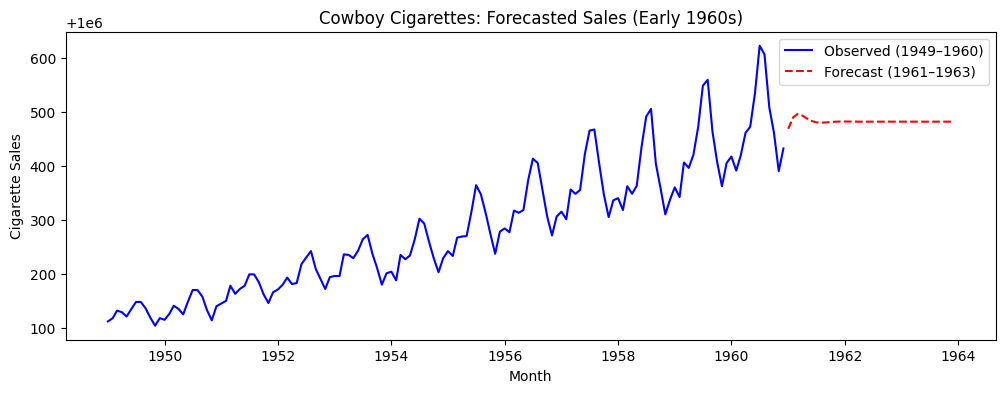

In [74]:
# Visualize historical data alongside forecasts
# The forecast extends the historical trend and seasonality into the future
plt.figure(figsize=(12,4))
plt.plot(y, label="Observed (1949–1960)", color='blue')  # Historical data
plt.plot(forecast_df["predicted_sales"], label="Forecast (1961–1963)", 
         color='red', linestyle='--')  # Future projections
plt.title("Cowboy Cigarettes: Forecasted Sales (Early 1960s)")
plt.xlabel("Month")
plt.ylabel("Cigarette Sales")
plt.legend()
plt.show()

## 4. Results & Strategic Implications

### Key Findings

The ARIMA(2,1,1) model reveals sustained upward momentum in Cowboy Cigarettes sales throughout the 1949-1960 baseline period, characterized by:

- **Growth Trajectory**: Accelerating sales trend indicating strong market position
- **Seasonal Patterns**: Pronounced cyclical variations with summer peaks and winter troughs, likely driven by discretionary spending patterns, tourism, and outdoor social activities during warmer months
- **Forecast Reliability**: Strong in-sample fit validates model credibility for near-term projections

### Primary Research Question: Sales Direction in Early 1960s

**Conclusion: INCREASING SALES TRAJECTORY**

Based on rigorous time series analysis of 1949-1960 data, the ARIMA model forecasts **continued sales growth** through 1961-1963. The projection indicates an ascending path with persistent seasonal variations, suggesting the manufacturer maintained strong market momentum during this period.

The forecast extends observed trends forward, indicating sales would likely have surpassed 1 million units monthly by 1963 if historical patterns persisted.

### Model Limitations & Considerations

- **Univariate Approach**: Forecasts rely solely on historical sales patterns without incorporating external factors
- **Structural Break Risk**: ARIMA models assume pattern continuity; unanticipated events (e.g., regulatory changes, health warnings, economic shocks) could invalidate projections
- **Vietnam War Context**: Military escalation in the early 1960s represents a potential structural break not captured in pre-1960 data


### Recommendations for Extended Analysis*Supporting comprehensive tobacco industry market assessment for public health policy development*

**Analysis prepared for U.S. Federal Health and Environment Department**  

1. **Multivariate Causal Analysis**: Incorporate regression modeling with economic indicators (GDP, disposable income), demographic trends, advertising expenditures, and regulatory variables to identify sales drivers

---

2. **Competitive Benchmarking**: Compare Cowboy Cigarettes performance against industry aggregates to assess market share dynamics and competitive positioning

5. **Regional Disaggregation**: If available, analyze geographic sales patterns to identify regional trends and inform targeted public health interventions

3. **Policy Impact Assessment**: Examine correlation between emerging public health warnings and consumption patterns to inform future health policy initiatives

4. **Validation with Post-1970 Data**: When data becomes available, validate forecast accuracy against actual 1961-1970 performance to refine modeling approach